# E20- Neural Networks in Keras 

Use keras framework to solve the below exercises.


In [1]:
import numpy as np
#import keras 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

C:\Users\Admin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
#pip install tensorflow-gpu

## 20.1 Predicting Student Admissions with Neural Networks

In this notebook, we predict student admissions to graduate schools based on six pieces of data:

1. GRE Scores (Test)
2. TOEFL Scores (Test)
3. University Ranking (1-5)
4. Statement of Purpose (SOP) and Letter of Recommendation Strength ( out of 5 )
5. Undergraduate GPA Scores (Grades)
6. Research Experience ( either 0 or 1 )

**Exercise:** Design and train a shallow neural network to predict the chance of Admission for each entry. Choose the number of hidden layer and neurons that minimizes the error. 

In [4]:
# Import dataset

data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
X = data.drop(data.columns[-1], axis=1)
Y = pd.DataFrame(data[data.columns[-1]])#, columns=['labels'])

#np.array(boston_dataset.target), columns=['labels'])

In [7]:
#Y

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=22)

In [9]:
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [10]:
# Normalize Data
from sklearn.preprocessing import StandardScaler

# Define the Preprocessing Method and Fit Training Data to it
scaler = StandardScaler()
scaler.fit(X)

# Make X_train to be the Scaled Version of Data
# This process scales all the values in all 6 columns and replaces them with the new values
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


In [11]:
X_train

array([[-0.0418297 , -0.68995225, -0.97516761, ...,  1.09894429,
         0.27070162, -1.12815215],
       [-0.0418297 , -0.36077656, -0.97516761, ..., -1.06433187,
        -0.6230308 ,  0.88640526],
       [ 0.66714832,  0.46216267,  0.77558214, ...,  0.01730621,
         0.65136543,  0.88640526],
       ...,
       [-0.66218548, -0.19618871, -0.97516761, ..., -1.06433187,
        -0.95404281, -1.12815215],
       [-0.66218548, -0.36077656,  1.65095702, ...,  0.01730621,
        -0.02720919, -1.12815215],
       [ 0.40128156,  0.29757483, -0.09979274, ..., -0.52351283,
        -0.06031039,  0.88640526]])

In [12]:
# As it is a regression problem the output is a neuron.
output_var = 1#Y_train.shape#[0]
print(output_var, ' output variables')

dims = X_train.shape[1]
print(dims, 'input variables')

1  output variables
7 input variables


In [13]:
from tensorflow import metrics as mt

In [14]:
from sklearn.model_selection import train_test_split
#from keras.callbacks import EarlyStopping, ModelCheckpoint

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K

In [16]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.15, random_state=42)

#fBestModel = 'best_model.h5' 
#early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 
#best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

#model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs=50, 
#          batch_size=128, verbose=True, callbacks=[best_model, early_stop]) 

In [17]:
dims = X_train.shape[1]
output_var = 1

In [18]:
K.clear_session()
print("Building model...")
model = Sequential()
model.add(Dense(256, input_shape=(dims,),activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))
model.compile(optimizer='sgd', loss='mean_squared_error')
model.summary()

Building model...
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               2048      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 68,097
Trainable params: 68,097
Non-trainable params: 0
_________________________________________________________________


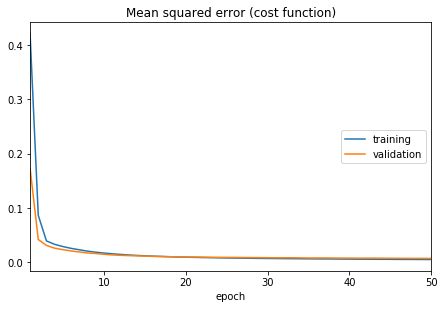

Mean squared error (cost function):
training   (min:    0.005, max:    0.421, cur:    0.005)
validation (min:    0.007, max:    0.173, cur:    0.007)


In [19]:
model.fit(X_train, Y_train,
          validation_data = (X_val, Y_val),
          epochs=50, 
          callbacks=[PlotLossesKeras()])

# 20.2 Decision Boundary --  Moons Dataset 

**Exercise:** Use keras framework to find a decision boundary for point in the make_moons.

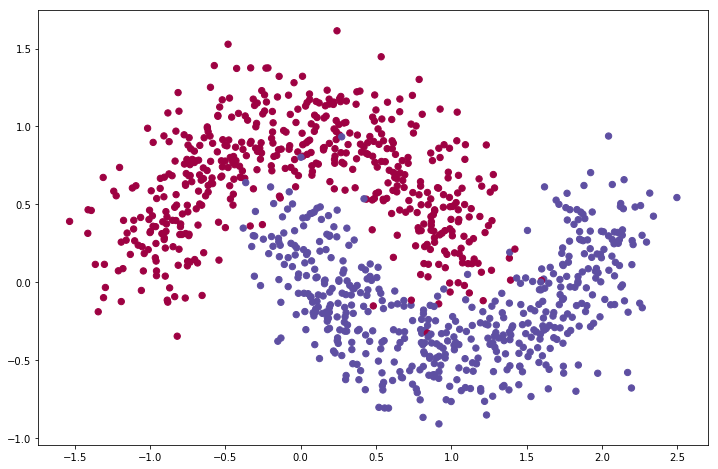

In [20]:
# Create moons dataset.
from keras.utils.np_utils import to_categorical
from sklearn.datasets.samples_generator import make_moons

x_train, y_train = make_moons(n_samples=1000, noise= 0.2, random_state=3)

plt.figure(figsize=(12, 8))
plt.scatter(x_train[:, 0], x_train[:,1], c=y_train, s=40, cmap=plt.cm.Spectral);


In [21]:
x_train

array([[ 0.55356914, -0.37596172],
       [ 0.98105873, -0.28467913],
       [ 1.87345298,  0.43682194],
       ...,
       [ 0.04851258,  0.90561169],
       [ 0.43233063, -0.45949733],
       [ 1.73748601, -0.11214153]])

In [22]:
y_train

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,

In [23]:
#y_train = to_categorical(y_train)
# As it is a regression problem the output is a neuron.
#output_var = 1#Y_train.shape#[0]
#print(output_var, ' output variables')

dims = x_train.shape[1]
print(dims, 'input variables')

2 input variables


**Hint:** Use the next function to plt the decision boundary,

In [24]:
K.clear_session()
print("Building model...")

print('Model variables: ', dims)

model = Sequential()
model.add(Dense(output_var, input_shape=(dims,)))

print(model.summary())

model.compile(optimizer='sgd', loss='mean_squared_error')
keras_model=model.fit(x_train, y_train, verbose=2,epochs=100)

Building model...
Model variables:  2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
 - 0s - loss: 1.2392
Epoch 2/100
 - 0s - loss: 0.5135
Epoch 3/100
 - 0s - loss: 0.3150
Epoch 4/100
 - 0s - loss: 0.2341
Epoch 5/100
 - 0s - loss: 0.1917
Epoch 6/100
 - 0s - loss: 0.1662
Epoch 7/100
 - 0s - loss: 0.1490
Epoch 8/100
 - 0s - loss: 0.1370
Epoch 9/100
 - 0s - loss: 0.1277
Epoch 10/100
 - 0s - loss: 0.1206
Epoch 11/100
 - 0s - loss: 0.1152
Epoch 12/100
 - 0s - loss: 0.1109
Epoch 13/100
 - 0s - loss: 0.1074
Epoch 14/100
 - 0s - loss: 0.1046
Epoch 15/100
 - 0s - loss: 0.1025
Epoch 16/100
 - 0s - loss: 0.1008
Epoch 17/100
 - 0s - loss: 0.0995
Epoch 18/100
 - 0s - loss: 0.0983
Epoch 19/100
 - 0s - loss: 0.0

In [25]:
import matplotlib as pl

In [26]:
def plot_decision_region(model, X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            '''
            Here 'model' is the neural network you previous trained.
            '''
            ZZ[i, j] = pred_fun(model, XX[i, j], YY[i, j])
    plt.contourf(XX, YY, ZZ, 30, cmap = pl.cm.coolwarm, vmin= 0, vmax=1)
    plt.colorbar()
    plt.xlabel("x")
    plt.ylabel("y")

In [27]:
def pred_fun(model,x1, x2):
    '''
    Here 'model' is the neural network you previous trained.
    '''
    xval = np.array([[x1, x2]])
    return model.predict(xval)[0, 0]

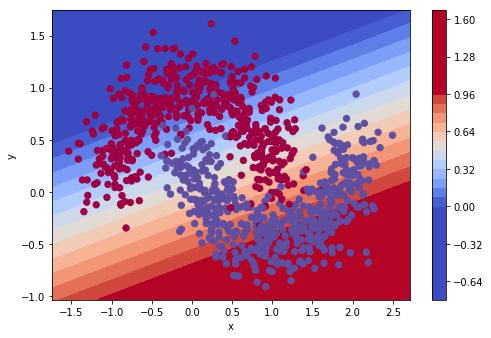

In [28]:
plt.figure(figsize = (8,16/3))    
'''
Here 'model' is the neural network you previous trained.
'''
plot_decision_region(model, x_train, pred_fun)
plt.scatter(x_train[:, 0], x_train[:,1], c=y_train, s=40, cmap=plt.cm.Spectral);
#plot_data(x_train, y_train)